In [1]:
pip install pandas matplotlib sklearn seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

Test Accuracy: 1.0000
Cross-Validation Accuracy: 1.0000 ± 0.0000


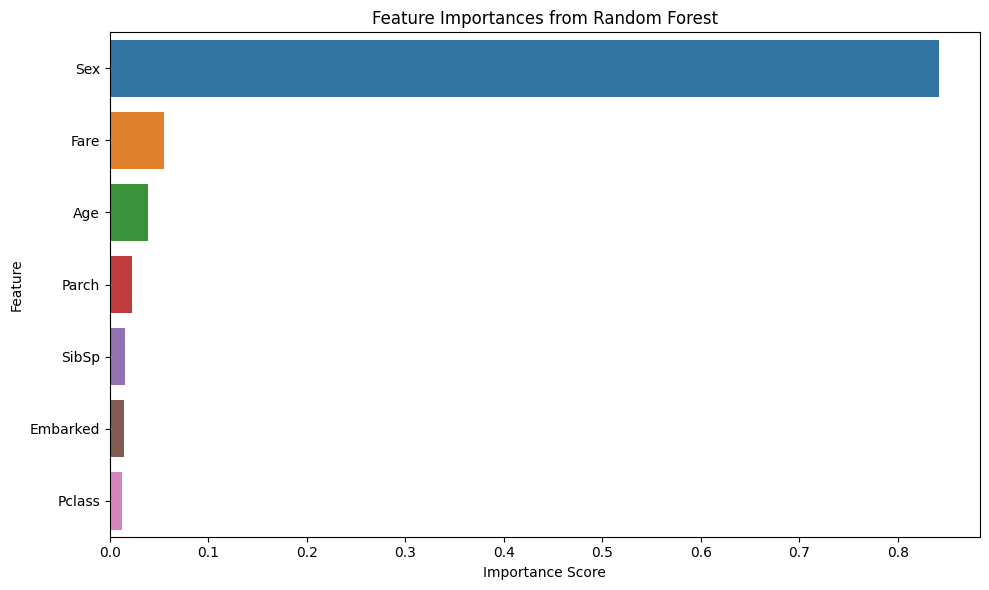

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("tested.csv")

# Drop columns not useful for prediction
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing values
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
df_cleaned['Fare'].fillna(df_cleaned['Fare'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Split into features and target
X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Plot feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


     PassengerId  PredictedSurvived
0            892                  0
1            893                  1
2            894                  0
3            895                  0
4            896                  1
..           ...                ...
413         1305                  0
414         1306                  1
415         1307                  0
416         1308                  0
417         1309                  0

[418 rows x 2 columns]


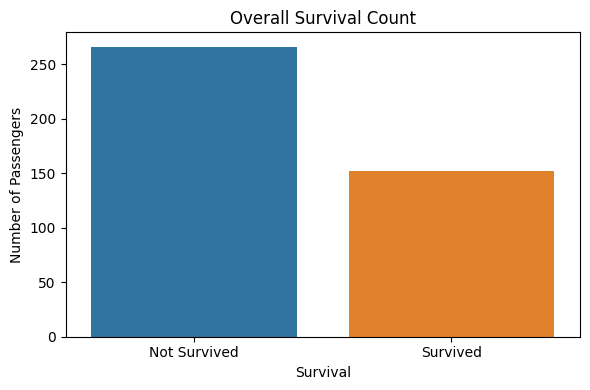

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("tested.csv")

# Keep a copy of PassengerId (optional)
passenger_ids = df['PassengerId']

# Drop unused or high-missing columns
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing values
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
df_cleaned['Fare'].fillna(df_cleaned['Fare'].median(), inplace=True)

# Encode categorical columns
le_sex = LabelEncoder()
df_cleaned['Sex'] = le_sex.fit_transform(df_cleaned['Sex'])

le_embarked = LabelEncoder()
df_cleaned['Embarked'] = le_embarked.fit_transform(df_cleaned['Embarked'])

# Features and target
X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict on the same data (for demonstration)
predictions = model.predict(X)

# Create a DataFrame with predictions
results = pd.DataFrame({
    'PassengerId': passenger_ids,
    'PredictedSurvived': predictions
})

print(results)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived')
plt.title('Overall Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()